# Fourier Analysis of Images

Install *sklearn*:

``` bash
$ pip install sklearn scikit-image
```

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.draw import line_aa

2-D Discrete Fourier Transform:

\begin{align}
\large
F(u,v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x,y) e^{-j2\pi(\frac{ux}{M}+\frac{vy}{N})}
\end{align}

2-D Inverse Discrete Fourier Transform:

\begin{align}
\large
f(x,y) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u,v) e^{j2\pi(\frac{ux}{M}+\frac{vy}{N})}
\end{align}

## From space to frequency

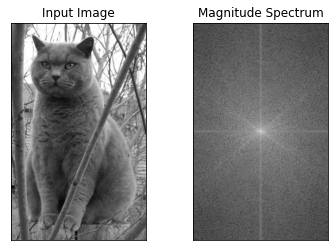

In [10]:
img = cv2.imread('data/img/cat1.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## From frequency to space

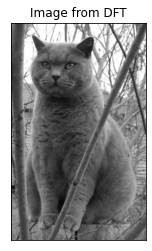

In [11]:
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.imshow(img_back, cmap = 'gray')
plt.title('Image from DFT'), plt.xticks([]), plt.yticks([])

plt.show()

## Practical analysis of the spectrum

In [12]:
def plotDFT(I):
    plt.subplot(121)
    plt.imshow(I, cmap = 'gray', vmin=0, vmax=255)
    plt.title(''), plt.xticks([]), plt.yticks([])

    f = np.fft.fft2(I)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift)

    plt.subplot(122)
    plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title(''), plt.xticks([]), plt.yticks([])

    plt.show()

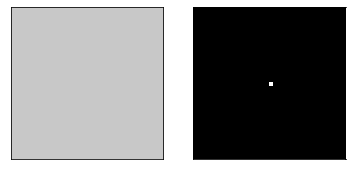

In [13]:
I = np.ones((50,50), dtype=np.uint8)*200
plotDFT(I)

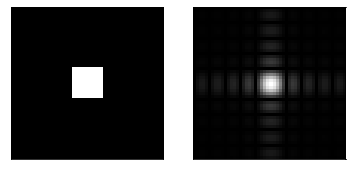

In [14]:
I = np.zeros((50,50), dtype=np.uint8)
I[20:30,20:30] = 255
plotDFT(I)

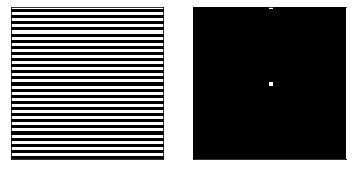

In [15]:
I = np.zeros((50,50), dtype=np.uint8)
for i in range(0,25):
    I[i*2,:] = 255
plotDFT(I)

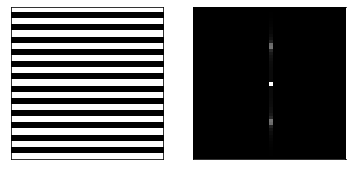

In [16]:
I = np.zeros((50,50), dtype=np.uint8)
for i in range(0,13):
    I[i*4,:] = 255
    I[i*4+1,:] = 255
plotDFT(I)

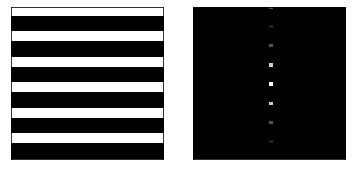

In [17]:
I = np.zeros((48,48), dtype=np.uint8)
for i in range(0,6):
    I[i*8,:] = 255
    I[i*8+1,:] = 255
    I[i*8+2,:] = 255#
plotDFT(I)

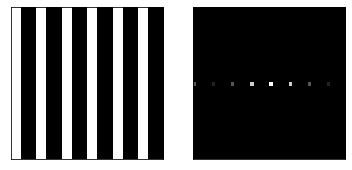

In [18]:
I = np.zeros((48,48), dtype=np.uint8)
for i in range(0,6):
    I[:,i*8] = 255
    I[:,i*8+1] = 255
    I[:,i*8+2] = 255
plotDFT(I)

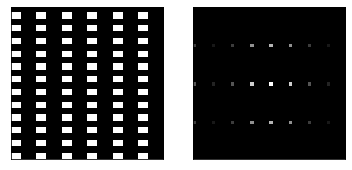

In [19]:
I = np.zeros((48,48), dtype=np.uint8)
for i in range(0,6):
    I[:,i*8] = 255
    I[:,i*8+1] = 255
    I[:,i*8+2] = 255
for i in range(0,12):
    I[i*4,:] = 0
    I[i*4+1,:] = 0
plotDFT(I)

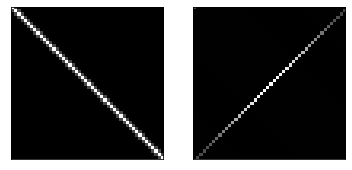

In [20]:
I = np.zeros((48,48), dtype=np.uint8)
rr, cc, val = line_aa(0, 0, 47, 47); I[rr, cc] = val * 255
plotDFT(I)

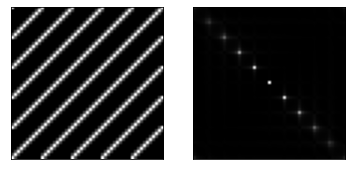

In [21]:
I = np.zeros((51,51), dtype=np.uint8)
for i in range(0, 5):
    rr, cc, val = line_aa(0, i*10, i*10, 0); I[rr, cc] = val * 255
for i in range(0, 5):
    rr, cc, val = line_aa(i*10, 50, 50, i*10); I[rr, cc] = val * 255
plotDFT(I)

## Fitering

If you can remove high or low frequences, you can use masks (binay images), where **white** represents **1**, and it is going to keep the original values, and the **black** represents **0**, and becomes the corresponding values to zero.

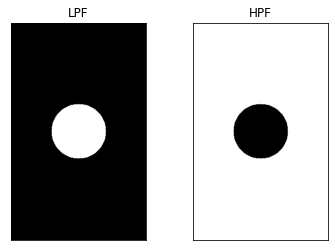

In [23]:
img = cv2.imread('data/img/cat1.jpg',0)

def createCircularMask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

# Low pass filter
maskLPF = createCircularMask(img.shape[0], img.shape[1], radius=50)
imgLPF = np.zeros(img.shape)
imgHPF = np.zeros(img.shape)
imgLPF[maskLPF] = 255
imgHPF[~maskLPF] = 255

plt.subplot(121); plt.imshow(imgLPF, cmap = 'gray')
plt.title('LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(122); plt.imshow(imgHPF, cmap = 'gray')
plt.title('HPF'), plt.xticks([]), plt.yticks([])
plt.show()

## Low Pass Filter: Radius = 50

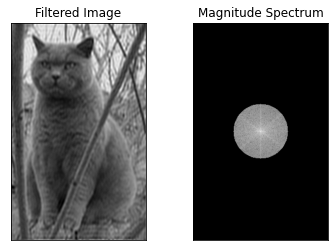

In [24]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

mask = createCircularMask(img.shape[0], img.shape[1], radius=50)

fshift[~mask] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

magnitude_spectrum = np.log(1+np.abs(fshift))

plt.subplot(121)
plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Low Pass Filter: Radius = 20

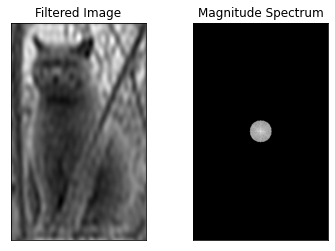

In [25]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

mask = createCircularMask(img.shape[0], img.shape[1], radius=20)

fshift[~mask] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

magnitude_spectrum = np.log(1+np.abs(fshift))

plt.subplot(121)
plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Low Pass Filter: Radius = 2

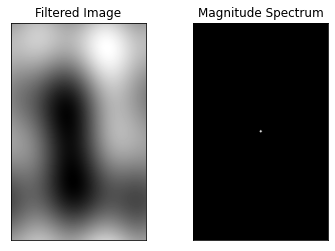

In [26]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

mask = createCircularMask(img.shape[0], img.shape[1], radius=2)

fshift[~mask] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

magnitude_spectrum = np.log(1+np.abs(fshift))

plt.subplot(121)
plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## High Pass Filter: Radius = 20

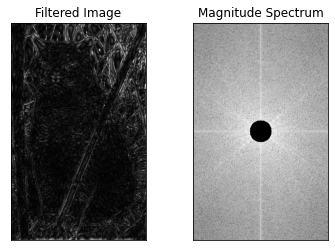

In [27]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

mask = createCircularMask(img.shape[0], img.shape[1], radius=20)

fshift[mask] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

magnitude_spectrum = np.log(1+np.abs(fshift))

plt.subplot(121)
plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## High Pass Filter: Radius = 2

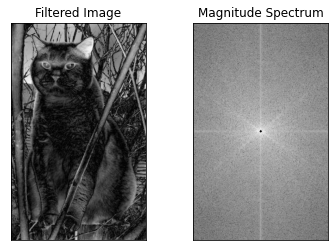

In [28]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

mask = createCircularMask(img.shape[0], img.shape[1], radius=2)

fshift[mask] = 0

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

magnitude_spectrum = np.log(1+np.abs(fshift))

plt.subplot(121)
plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Relation with the spatial filters

Remember the convolution theorem:

\begin{align}
\large
\mathscr{F} \{ f \ast g \} = \mathscr{F} \{ f \}  \cdot \mathscr{F} \{ g \}
\end{align}

So, if you want to apply a spatial filter, you could calculate its fourier transform, and multiply it with the image point to point. Let's see the fourier transform of some spatial filters, in order to demostrate its frequency characteristic.

![title](res/img/filters.png)

## Frequency and Image Focus

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

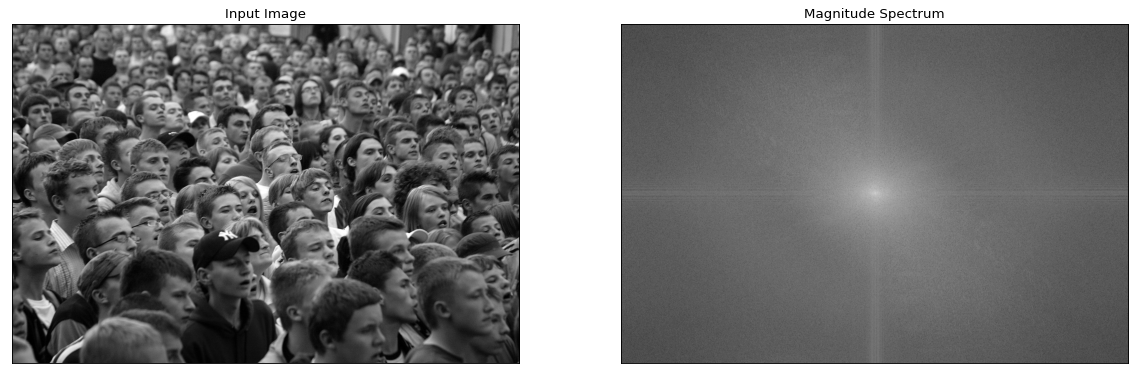

In [30]:
img = cv2.imread('res/img/crowd.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

fig=plt.figure(figsize=(18, 16), dpi= 80)

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

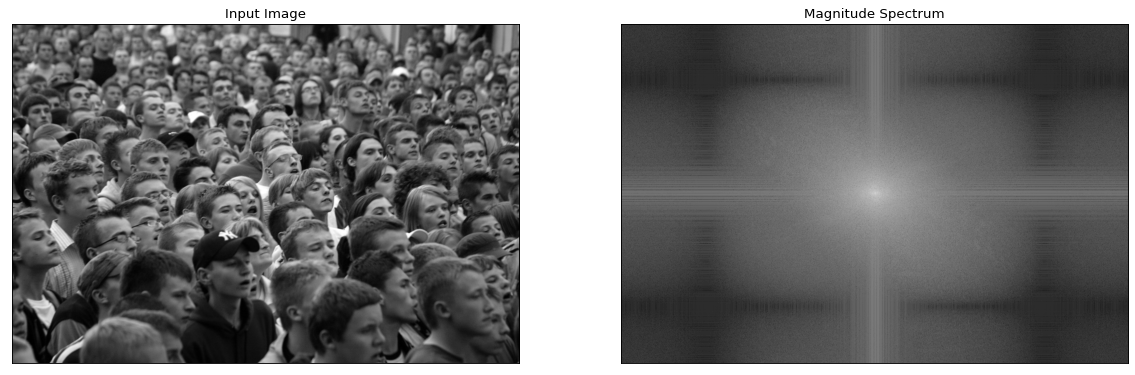

In [31]:
from scipy import signal

def mean_filter(img, N):
    kernel = np.ones((N,N))/(N*N)
    return signal.convolve2d(img, kernel, boundary='symm', mode='same')

img = mean_filter(img, 3)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

fig=plt.figure(figsize=(18, 16), dpi= 80)

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

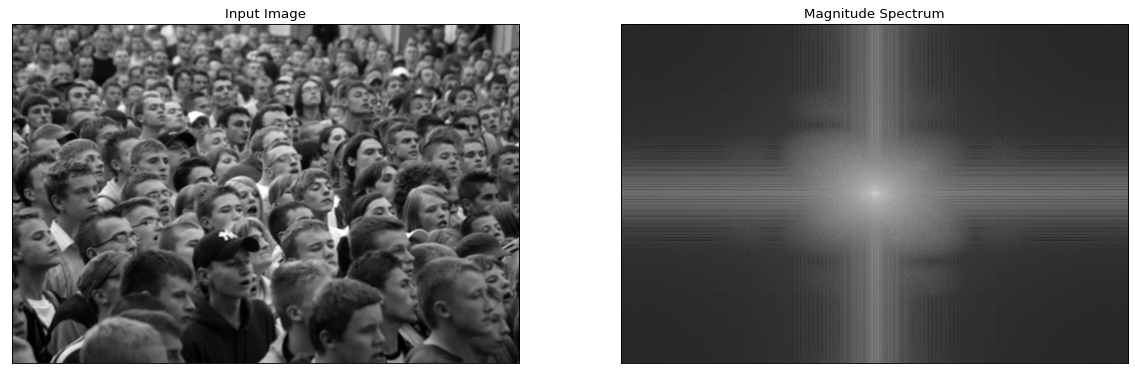

In [32]:
img = mean_filter(img, 5)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

fig=plt.figure(figsize=(18, 16), dpi= 80)

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

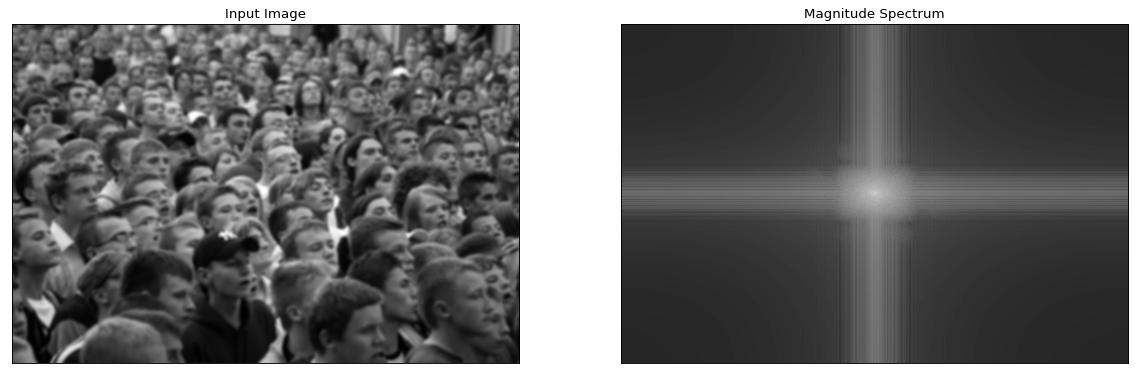

In [33]:
img = mean_filter(img, 11)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

fig=plt.figure(figsize=(18, 16), dpi= 80)

plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])